## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Reading Dataset

In [4]:
import pandas as pd
from pyxlsb import open_workbook as open_xlsb

df=[]

with open_xlsb('Data_CSPL_Risk_model.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df=pd.DataFrame(df[1:],columns=df[0])

In [5]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1.0,0.0,0.0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2.0,0.0,1.0,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
2,3.0,0.0,0.0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31.0,31.0,16.0,TIER 1,0.0
3,4.0,0.0,0.0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
4,5.0,0.0,0.0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,TIER 3,0.0
119524,119525.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,33000.0,NaN,NaN,3.0,1.0,0.0,TIER 3,1.0
119525,119526.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,TIER 3,0.0
119526,119527.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,31990.0,43600.0,NaN,13.0,0.0,0.0,0.0,TIER 1,0.0


## Taking a look through dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
V1     119528 non-null float64
V2     119528 non-null float64
V3     119528 non-null float64
V4     85048 non-null float64
V5     85048 non-null float64
V6     85048 non-null float64
V7     85048 non-null float64
V8     85048 non-null float64
V9     85048 non-null float64
V10    85048 non-null object
V11    85048 non-null float64
V12    85048 non-null float64
V13    85048 non-null object
V14    85048 non-null object
V15    84131 non-null object
V16    85048 non-null float64
V17    85048 non-null float64
V18    119528 non-null float64
V19    119528 non-null float64
V20    119528 non-null float64
V21    36626 non-null float64
V22    119528 non-null float64
V23    19281 non-null float64
V24    19028 non-null float64
V25    104467 non-null float64
V26    13431 non-null float64
V27    20433 non-null float64
V28    119528 non-null float64
V29    119528 non-null float64
V30    119528

In [7]:
df.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048,...,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528,119528.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIER 4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41063,NaN
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,NaN,...,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,NaN,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,NaN,...,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,NaN,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,NaN,...,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,NaN,...,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,NaN,...,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,NaN,...,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [8]:
print(df.shape)
for i in df.columns.values:
    print (i)
    print (len(df[i].unique()))
    print("------")

(119528, 32)
V1
119528
------
V2
2
------
V3
13
------
V4
35
------
V5
25
------
V6
3293
------
V7
6290
------
V8
32
------
V9
3251
------
V10
6
------
V11
8
------
V12
1025
------
V13
3
------
V14
6
------
V15
4
------
V16
13487
------
V17
50
------
V18
121
------
V19
109
------
V20
47
------
V21
9901
------
V22
1
------
V23
7273
------
V24
10415
------
V25
8682
------
V26
225
------
V27
247
------
V28
86
------
V29
81
------
V30
46
------
V31
4
------
V32
2
------


In [9]:
df.isnull().sum()

V1          0
V2          0
V3          0
V4      34480
V5      34480
V6      34480
V7      34480
V8      34480
V9      34480
V10     34480
V11     34480
V12     34480
V13     34480
V14     34480
V15     35397
V16     34480
V17     34480
V18         0
V19         0
V20         0
V21     82902
V22         0
V23    100247
V24    100500
V25     15061
V26    106097
V27     99095
V28         0
V29         0
V30         0
V31         0
V32         0
dtype: int64

## Imputations

### Median Imputations

In [10]:
import statistics
from statistics import median

In [11]:
median(df['V4'])

20.0

In [12]:
median(df['V5'])

1.0

In [13]:
median(df['V6'])

2612.0

In [14]:
median(df['V7'])

46900.0

In [15]:
median(df['V8'])

24.0

In [16]:
median(df['V9'])

3578.0

In [17]:
median(df['V11'])

1.0

In [18]:
median(df['V12'])

14.0

In [19]:
median(df['V17'])

43.0

In [20]:
median(df['V25'])

32900.0

In [21]:
df['V4'].fillna(20.0,inplace=True)

In [22]:
df['V5'].fillna(1.0,inplace=True)

In [23]:
df['V6'].fillna(2612.0,inplace=True)

In [24]:
df['V7'].fillna(46900.0,inplace=True)

In [25]:
df['V8'].fillna(24.0,inplace=True)

In [26]:
df['V9'].fillna(3578.0,inplace=True)

In [27]:
df['V11'].fillna(1.0,inplace=True)

In [28]:
df['V12'].fillna(14.0,inplace=True)

In [29]:
df['V17'].fillna(43.0,inplace=True)

In [30]:
df['V25'].fillna(32900.0,inplace=True)

### Mode Imputations

In [31]:
statistics.mode(df['V10'])

In [32]:
statistics.mode(df['V13'])

'MALE'

In [33]:
statistics.mode(df['V14'])

'SELF'

In [34]:
statistics.mode(df['V15'])

'OWNED'

In [35]:
df['V10'].fillna('SC',inplace=True)

In [36]:
df['V13'].fillna('MALE',inplace=True)

In [37]:
df['V14'].fillna('SELF',inplace=True)

In [38]:
df['V15'].fillna('OWNED',inplace=True)

Dropping the variables that have >50% NaN values in them

In [39]:
df=df.drop(columns=['V21','V23','V24','V26','V27'])

Dropping the variable 'V16', it is Date of Birth and we already have a variable that have age

In [40]:
df=df.drop(columns=['V16'])

## Visaulization

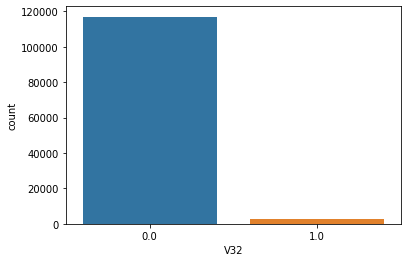

In [41]:
sns.countplot(x='V32',data=df);

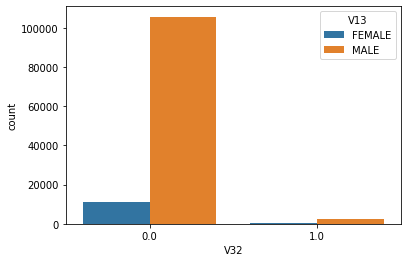

In [42]:
ax=sns.countplot(x='V32',hue='V13', data=df);

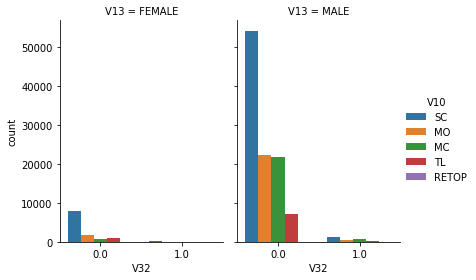

In [43]:
g=sns.catplot(x='V32',hue='V10',col='V13',
                data=df,kind='count',
                height=4,aspect=.7);

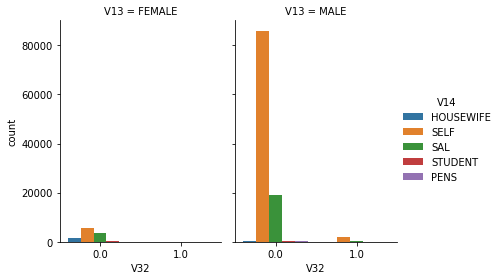

In [44]:
g=sns.catplot(x='V32',hue='V14',col='V13',
                data=df,kind='count',
                height=4,aspect=.7);

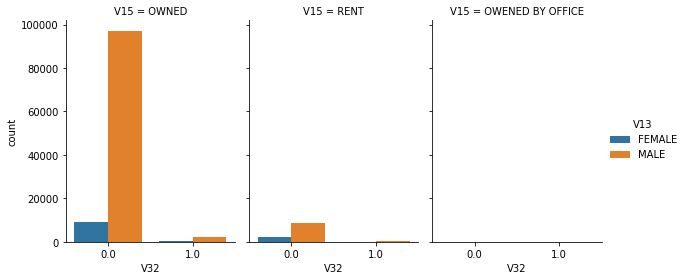

In [45]:
g=sns.catplot(x='V32',hue='V13',col='V15',
                data=df,kind='count',
                height=4,aspect=.7);

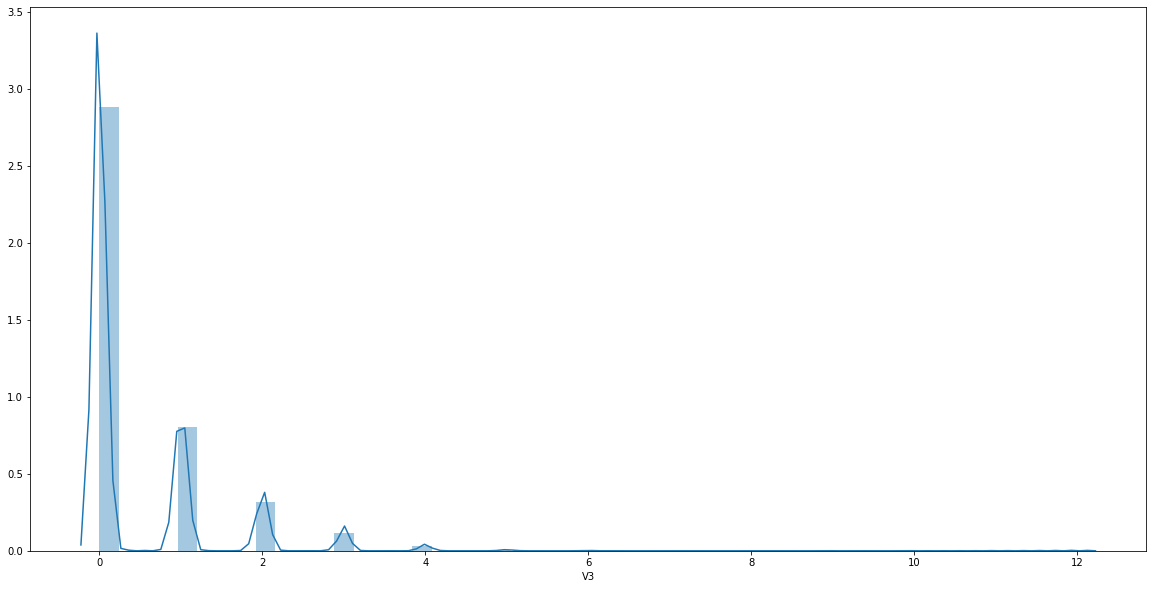

In [46]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V3']);

In [47]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V17,V18,V19,V20,V22,V25,V28,V29,V30,V32
V1,1.000000,-0.005780,-0.060434,-0.124730,0.008355,0.338458,0.195901,-0.047896,0.170557,0.115172,...,0.260612,-0.015868,-0.017580,-0.003505,NaN,-0.056759,-0.056879,-0.052735,-0.048742,-0.005902
V2,-0.005780,1.000000,0.045418,0.009549,0.154280,0.005549,0.000574,-0.008923,0.010513,0.001716,...,-0.017801,-0.007935,-0.006545,-0.001806,NaN,0.006822,0.005489,0.002478,0.001026,0.012339
V3,-0.060434,0.045418,1.000000,0.056462,0.700578,-0.038695,-0.041610,-0.004095,-0.034665,0.018078,...,-0.015225,-0.041178,-0.018175,-0.073137,NaN,-0.055123,0.031735,0.028040,0.022757,0.071078
V4,-0.124730,0.009549,0.056462,1.000000,0.238198,-0.233197,0.404012,0.872380,-0.138555,-0.000695,...,0.039756,0.012076,0.003338,0.029604,NaN,0.222690,0.017726,0.014966,0.012603,0.012776
V5,0.008355,0.154280,0.700578,0.238198,1.000000,-0.030196,0.061655,0.142976,-0.057109,0.041048,...,0.013868,-0.030902,-0.014634,-0.052468,NaN,-0.000807,0.027119,0.023256,0.018570,0.057728
V6,0.338458,0.005549,-0.038695,-0.233197,-0.030196,1.000000,0.666718,-0.221860,0.023858,0.091433,...,-0.052797,0.062759,0.034646,0.097166,NaN,0.380167,0.020733,0.016350,0.012108,0.001411
V7,0.195901,0.000574,-0.041610,0.404012,0.061655,0.666718,1.000000,0.529978,-0.105943,0.249225,...,-0.058157,0.094821,0.049360,0.148873,NaN,0.606923,0.039638,0.031461,0.026347,0.013947
V8,-0.047896,-0.008923,-0.004095,0.872380,0.142976,-0.221860,0.529978,1.000000,-0.154686,0.125878,...,0.034163,0.043484,0.019984,0.069249,NaN,0.310187,0.021802,0.017316,0.015529,0.015655
V9,0.170557,0.010513,-0.034665,-0.138555,-0.057109,0.023858,-0.105943,-0.154686,1.000000,-0.120670,...,-0.006391,-0.084486,-0.068530,-0.050270,NaN,-0.081406,-0.054707,-0.050169,-0.046424,0.002697
V11,0.115172,0.001716,0.018078,-0.000695,0.041048,0.091433,0.249225,0.125878,-0.120670,1.000000,...,0.048128,0.037903,0.032184,0.004853,NaN,0.129150,0.020190,0.017773,0.015294,-0.006435


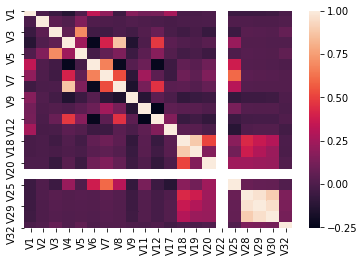

In [48]:
sns.heatmap(df.corr())

Here in 'V22' it is showing a white line because that variable only consist of 1 unique value.

Therefore we will drop that particular column.

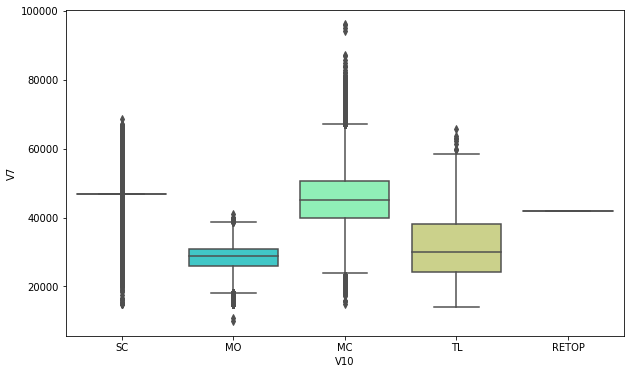

In [49]:
f,ax=plt.subplots(figsize=(10,6))
g=sns.boxplot(x='V10',y='V7',data=df,palette='rainbow');

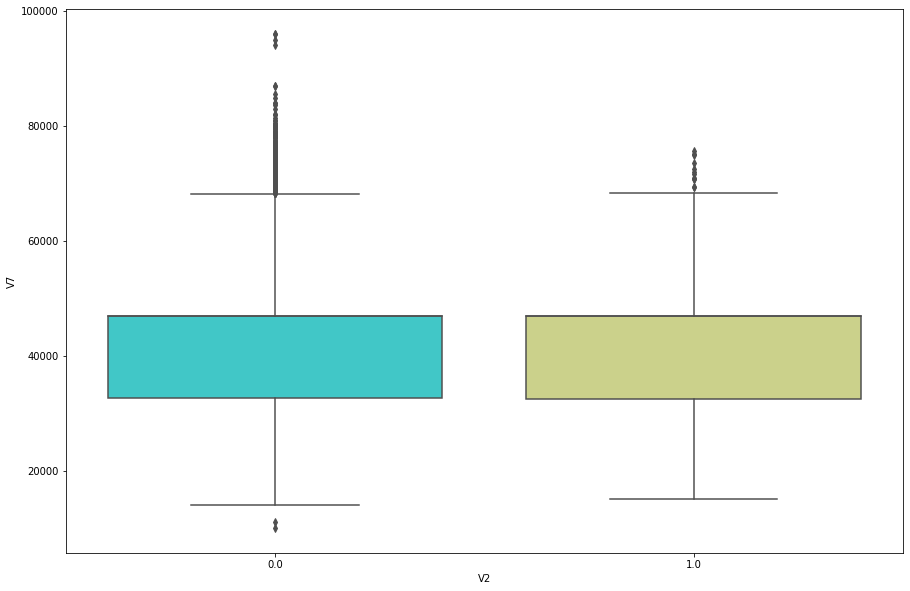

In [50]:
f,ax=plt.subplots(figsize=(15,10))
g=sns.boxplot(x='V2',y='V7',data=df,palette='rainbow');

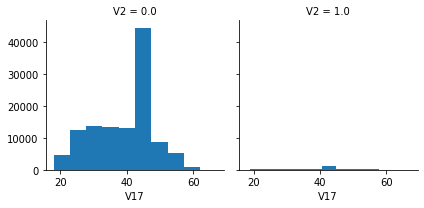

In [51]:
g=sns.FacetGrid(data=df,col='V2')
g.map(plt.hist,'V17');

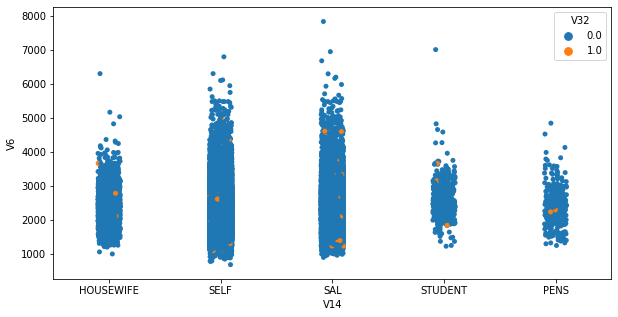

In [52]:
f,ax=plt.subplots(figsize=(10,5))
sns.stripplot(x='V14',y='V6',data=df,hue='V32',jitter=True);

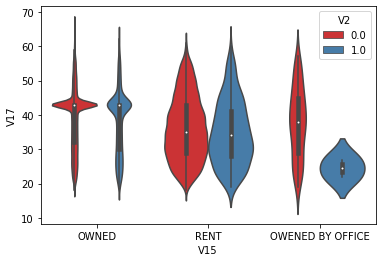

In [53]:
sns.violinplot(x='V15',y='V17',data=df,hue='V2',palette='Set1')

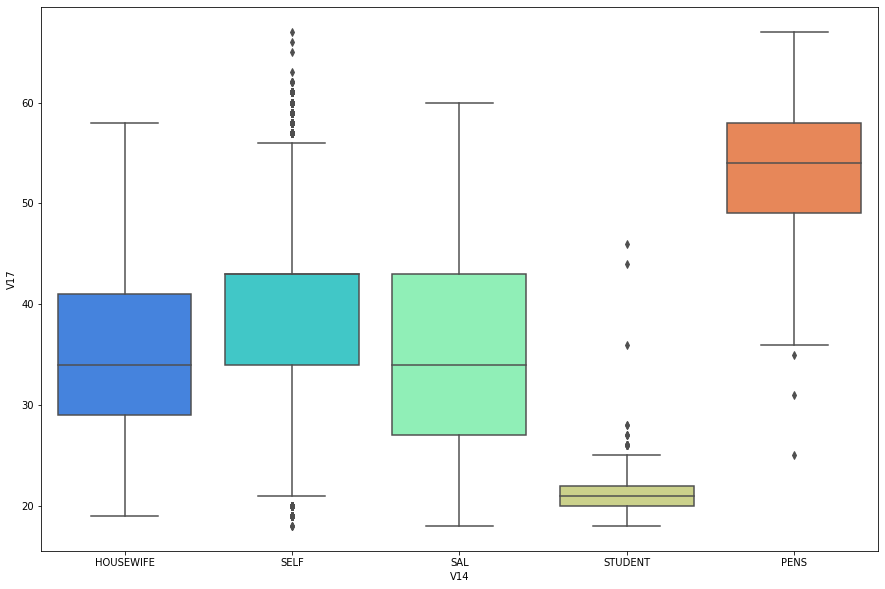

In [54]:
f,ax=plt.subplots(figsize=(15,10))
g=sns.boxplot(x='V14',y='V17',data=df,palette='rainbow');

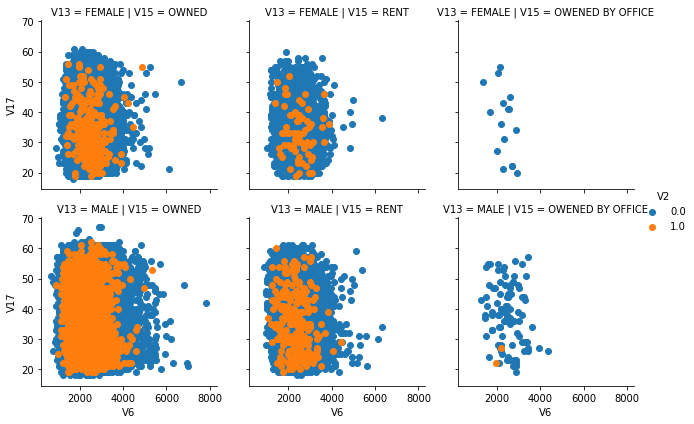

In [55]:
g=sns.FacetGrid(df,col='V15',row='V13',hue='V2')
g=g.map(plt.scatter,'V6','V17').add_legend();

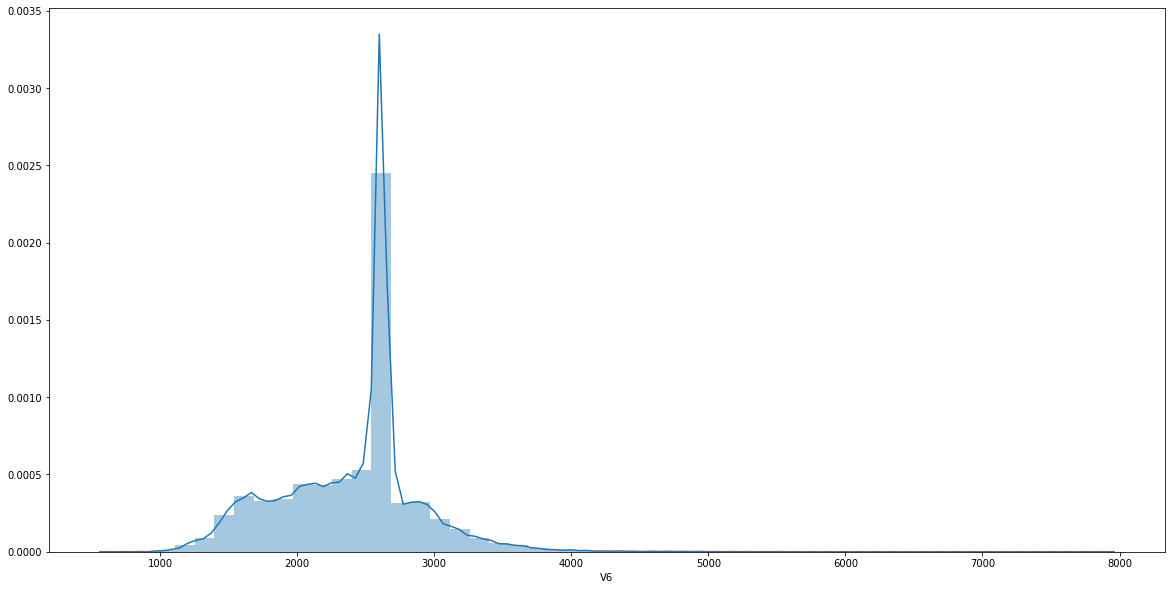

In [56]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V6']);

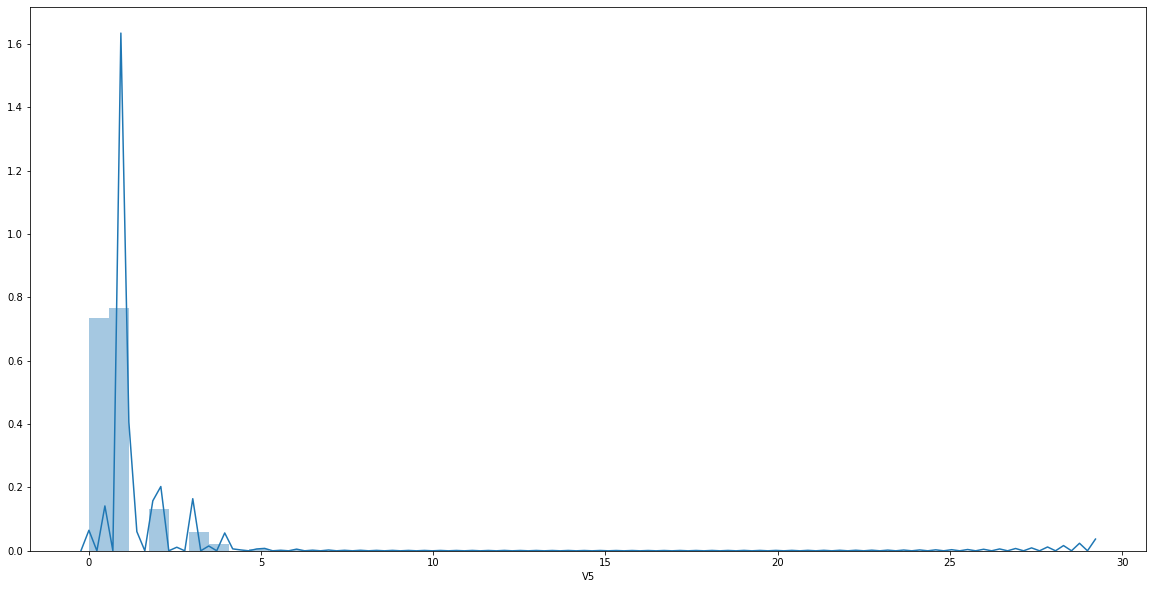

In [57]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V5']);

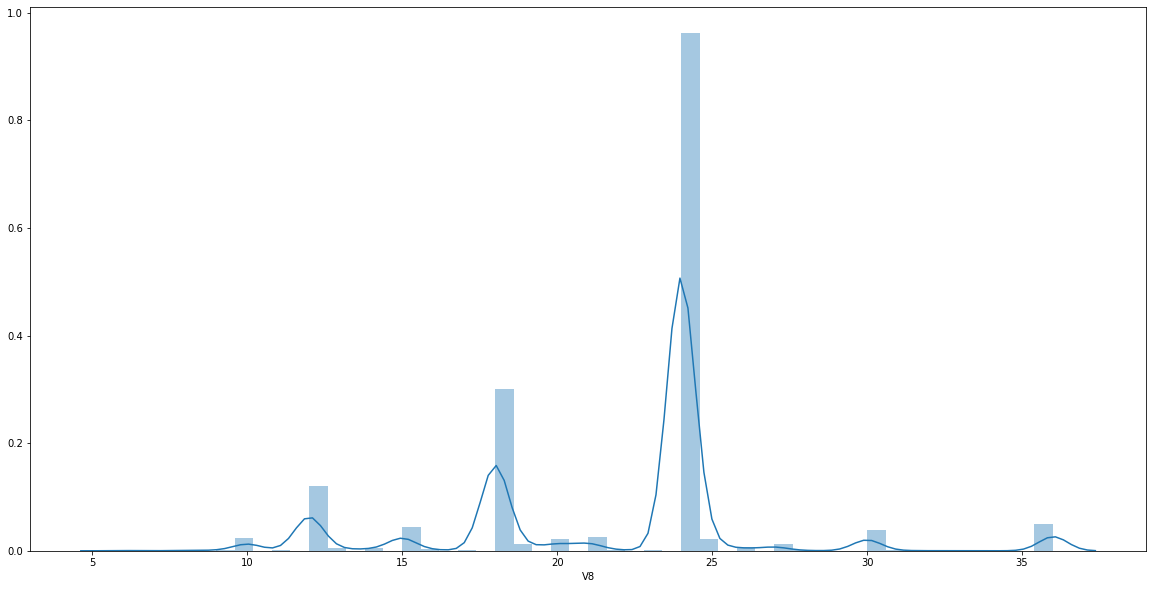

In [58]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V8']);

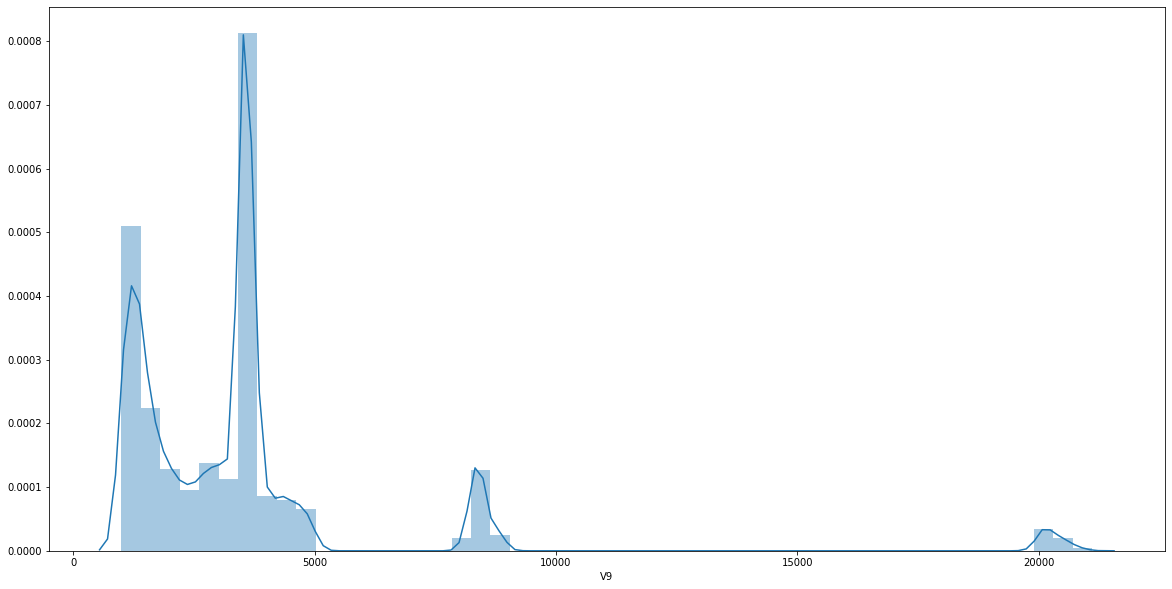

In [59]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V9']);

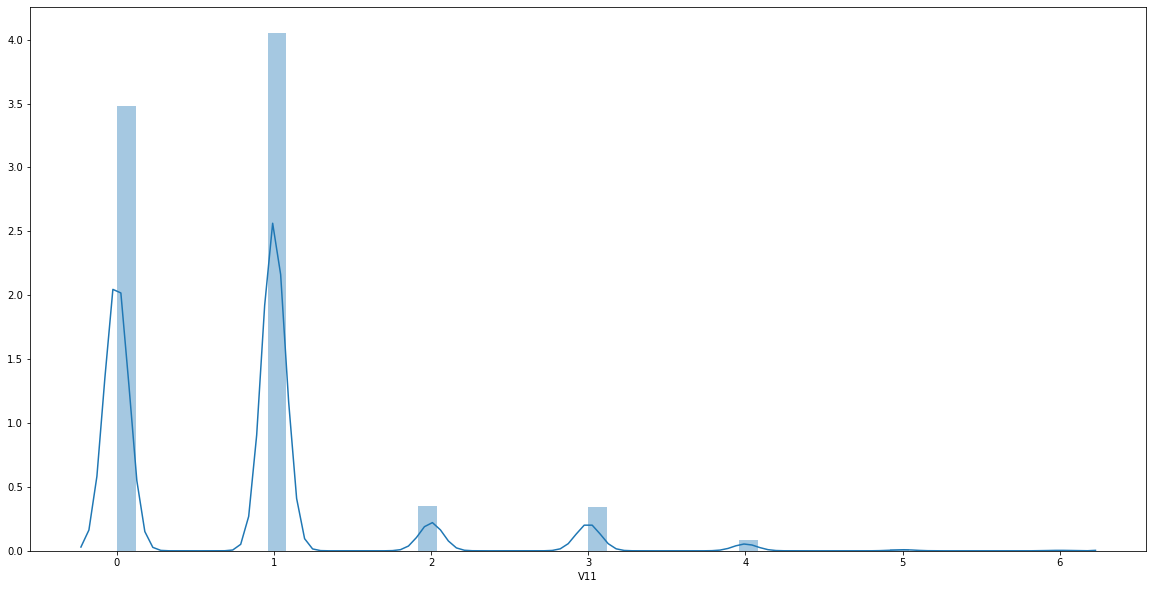

In [60]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['V11']);

## Dummification of Categorical Variables

In [61]:
dummy_1=pd.get_dummies(df['V10'],drop_first=True)

In [62]:
dummy_2=pd.get_dummies(df['V13'],drop_first=True)

In [63]:
dummy_3=pd.get_dummies(df['V14'],drop_first=True)

In [64]:
dummy_4=pd.get_dummies(df['V15'],drop_first=True)

In [65]:
dummy_5=pd.get_dummies(df['V31'],drop_first=True)

In [66]:
df=df.drop(columns=['V10','V13','V14','V15','V31','V22'])

In [67]:
df=pd.concat([df,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,MALE,PENS,SAL,SELF,STUDENT,OWNED,RENT,TIER 2,TIER 3,TIER 4
0,1.0,0.0,0.0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,0.0,1.0,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,3.0,0.0,0.0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,...,1,0,0,1,0,0,1,0,0,0
3,4.0,0.0,0.0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,...,0,0,1,0,0,0,1,0,0,0
4,5.0,0.0,0.0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524.0,0.0,1.0,20.0,1.0,2612.0,46900.0,24.0,3578.0,1.0,...,1,0,0,1,0,1,0,0,1,0
119524,119525.0,0.0,0.0,20.0,1.0,2612.0,46900.0,24.0,3578.0,1.0,...,1,0,0,1,0,1,0,0,1,0
119525,119526.0,0.0,0.0,20.0,1.0,2612.0,46900.0,24.0,3578.0,1.0,...,1,0,0,1,0,1,0,0,1,0
119526,119527.0,0.0,1.0,20.0,1.0,2612.0,46900.0,24.0,3578.0,1.0,...,1,0,0,1,0,1,0,0,0,0


## Setting Independent and Dependent Variables

In [68]:
X=df.drop(columns=['V32'])
y=df['V32']

In [69]:
X.shape

(119528, 33)

## Train - Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,
                                                       random_state=44)

In [71]:
X_train.shape

(80083, 33)

## Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Modelling

### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN=KNeighborsClassifier()

In [74]:
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
y_pred_KNN=classifier_KNN.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_KNN)
cm

array([[38497,    56],
       [  877,    15]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38553
         1.0       0.21      0.02      0.03       892

    accuracy                           0.98     39445
   macro avg       0.59      0.51      0.51     39445
weighted avg       0.96      0.98      0.97     39445



### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT=DecisionTreeClassifier(criterion='entropy',random_state=44)

In [79]:
classifier_DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=44, splitter='best')

In [80]:
y_pred_DT=classifier_DT.predict(X_test)

In [81]:
cm=confusion_matrix(y_test,y_pred_DT)
cm

array([[37710,   843],
       [  778,   114]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     38553
         1.0       0.12      0.13      0.12       892

    accuracy                           0.96     39445
   macro avg       0.55      0.55      0.55     39445
weighted avg       0.96      0.96      0.96     39445

